<a href="https://colab.research.google.com/github/Leopaz1/trabalho-machine-learning/blob/main/Quest%C3%A3o_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv"

try:
    df = pd.read_csv(url)
    print("Dataset carregado com sucesso!")
    print(f"Shape: {df.shape}")
    print("\nPrimeiras linhas:")
    print(df.head())

except:
    print("Erro ao carregar dataset online, criando dados de exemplo...")
    transacoes_exemplo = [
        ['leite', 'pao', 'manteiga'],
        ['leite', 'cafe'],
        ['pao', 'manteiga', 'queijo'],
        ['leite', 'pao', 'queijo'],
        ['cafe', 'acucar'],
        ['pao', 'manteiga'],
        ['leite', 'cafe', 'acucar'],
        ['pao', 'queijo'],
        ['leite', 'pao'],
        ['cafe', 'pao']
    ]
    df = pd.DataFrame({'transacoes': transacoes_exemplo})
    print("Dados de exemplo criados")

Dataset carregado com sucesso!
Shape: (38765, 3)

Primeiras linhas:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [ ]:

if 'Member_number' in df.columns and 'itemDescription' in df.columns:
    # Dataset real - agrupar por transacao
    transacoes = df.groupby('Member_number')['itemDescription'].apply(list).values
    print(f"Total de transacoes: {len(transacoes)}")
else:

    transacoes = df['transacoes'].values
    print(f"Total de transacoes: {len(transacoes)}")

print("\nPrimeiras 3 transacoes:")
for i, trans in enumerate(transacoes[:3]):
    print(f"Transacao {i+1}: {trans}")

Total de transacoes: 3898

Primeiras 3 transacoes:
Transacao 1: ['soda', 'canned beer', 'sausage', 'sausage', 'whole milk', 'whole milk', 'pickled vegetables', 'misc. beverages', 'semi-finished bread', 'hygiene articles', 'yogurt', 'pastry', 'salty snack']
Transacao 2: ['frankfurter', 'frankfurter', 'beef', 'sausage', 'whole milk', 'soda', 'curd', 'white bread', 'whole milk', 'soda', 'whipped/sour cream', 'rolls/buns']
Transacao 3: ['tropical fruit', 'butter milk', 'butter', 'frozen vegetables', 'sugar', 'specialty chocolate', 'whole milk', 'other vegetables']


In [ ]:
te = TransactionEncoder()
te_array = te.fit(transacoes).transform(transacoes)
df_transacoes = pd.DataFrame(te_array, columns=te.columns_)

print("Formato one-hot das transacoes:")
print(f"Shape: {df_transacoes.shape}")
print(f"Total de produtos unicos: {len(df_transacoes.columns)}")
print("\nProdutos disponiveis:")
print(list(df_transacoes.columns))


print("\nPrimeiras 5 transacoes (formato one-hot):")
print(df_transacoes.head())

Formato one-hot das transacoes:
Shape: (3898, 167)
Total de produtos unicos: 167

Produtos disponiveis:
['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese ', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish

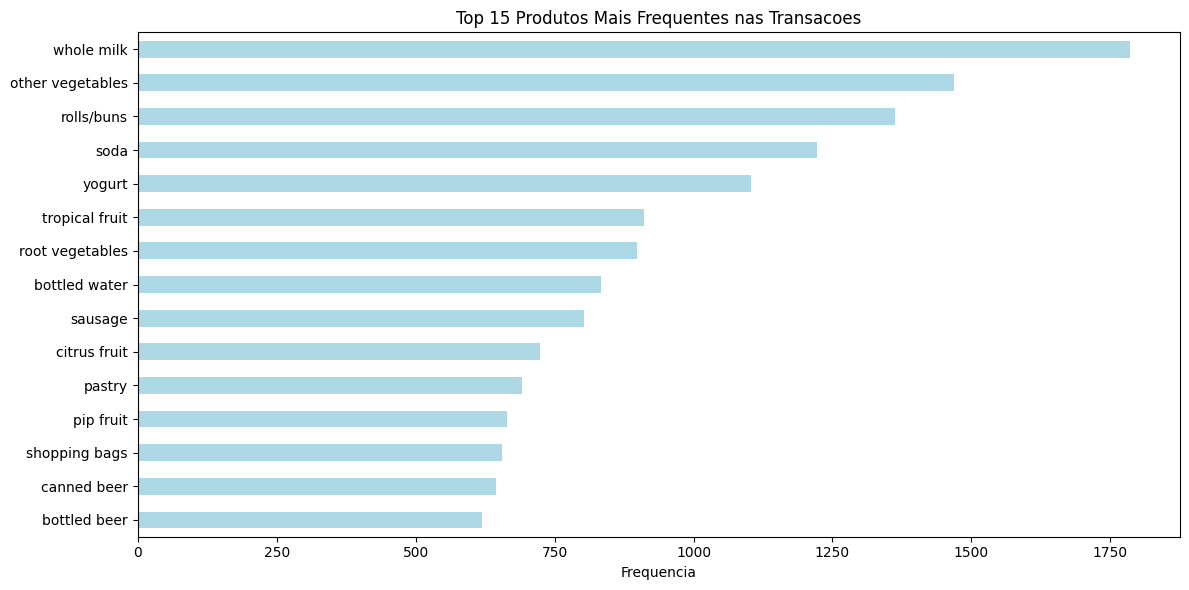

Top 10 produtos mais frequentes:
1. whole milk: 1786 transacoes (45.8%)
2. other vegetables: 1468 transacoes (37.7%)
3. rolls/buns: 1363 transacoes (35.0%)
4. soda: 1222 transacoes (31.3%)
5. yogurt: 1103 transacoes (28.3%)
6. tropical fruit: 911 transacoes (23.4%)
7. root vegetables: 899 transacoes (23.1%)
8. bottled water: 833 transacoes (21.4%)
9. sausage: 803 transacoes (20.6%)
10. citrus fruit: 723 transacoes (18.5%)


In [ ]:

frequencia_produtos = df_transacoes.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
frequencia_produtos.head(15).plot(kind='barh', color='lightblue')
plt.title('Top 15 Produtos Mais Frequentes nas Transacoes')
plt.xlabel('Frequencia')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 10 produtos mais frequentes:")
for i, (produto, freq) in enumerate(frequencia_produtos.head(10).items()):
    print(f"{i+1}. {produto}: {freq} transacoes ({freq/len(transacoes)*100:.1f}%)")

In [ ]:
itemsets_frequentes = apriori(df_transacoes, min_support=0.05, use_colnames=True)

print("Itemsets frequentes encontrados:")
print(f"Total de itemsets: {len(itemsets_frequentes)}")
print("\nTop 10 itemsets mais frequentes:")
itemsets_frequentes['length'] = itemsets_frequentes['itemsets'].apply(lambda x: len(x))
print(itemsets_frequentes.sort_values('support', ascending=False).head(10))


itemsets_multiplos = itemsets_frequentes[itemsets_frequentes['length'] > 1]
print(f"\nItemsets com multiplos produtos: {len(itemsets_multiplos)}")

Itemsets frequentes encontrados:
Total de itemsets: 165

Top 10 itemsets mais frequentes:
      support                        itemsets  length
55   0.458184                    (whole milk)       1
37   0.376603              (other vegetables)       1
41   0.349666                    (rolls/buns)       1
47   0.313494                          (soda)       1
56   0.282966                        (yogurt)       1
51   0.233710                (tropical fruit)       1
42   0.230631               (root vegetables)       1
5    0.213699                 (bottled water)       1
44   0.206003                       (sausage)       1
116  0.191380  (other vegetables, whole milk)       2

Itemsets com multiplos produtos: 108


In [ ]:
regras = association_rules(itemsets_frequentes, metric="confidence", min_threshold=0.1)

print("Regras de associacao geradas:")
print(f"Total de regras: {len(regras)}")


regras_ordenadas = regras.sort_values('lift', ascending=False)

print("\nTop 10 regras mais relevantes (por lift):")
colunas_interesse = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
print(regras_ordenadas[colunas_interesse].head(10))

Regras de associacao geradas:
Total de regras: 260

Top 10 regras mais relevantes (por lift):
                           antecedents                        consequents  \
197                    (bottled water)     (other vegetables, whole milk)   
196     (other vegetables, whole milk)                    (bottled water)   
198                 (other vegetables)        (bottled water, whole milk)   
195        (bottled water, whole milk)                 (other vegetables)   
239                           (yogurt)     (other vegetables, whole milk)   
238     (other vegetables, whole milk)                           (yogurt)   
199                       (whole milk)  (bottled water, other vegetables)   
194  (bottled water, other vegetables)                       (whole milk)   
250           (rolls/buns, whole milk)                           (yogurt)   
251                           (yogurt)           (rolls/buns, whole milk)   

      support  confidence      lift  
197  0.056183    0.2

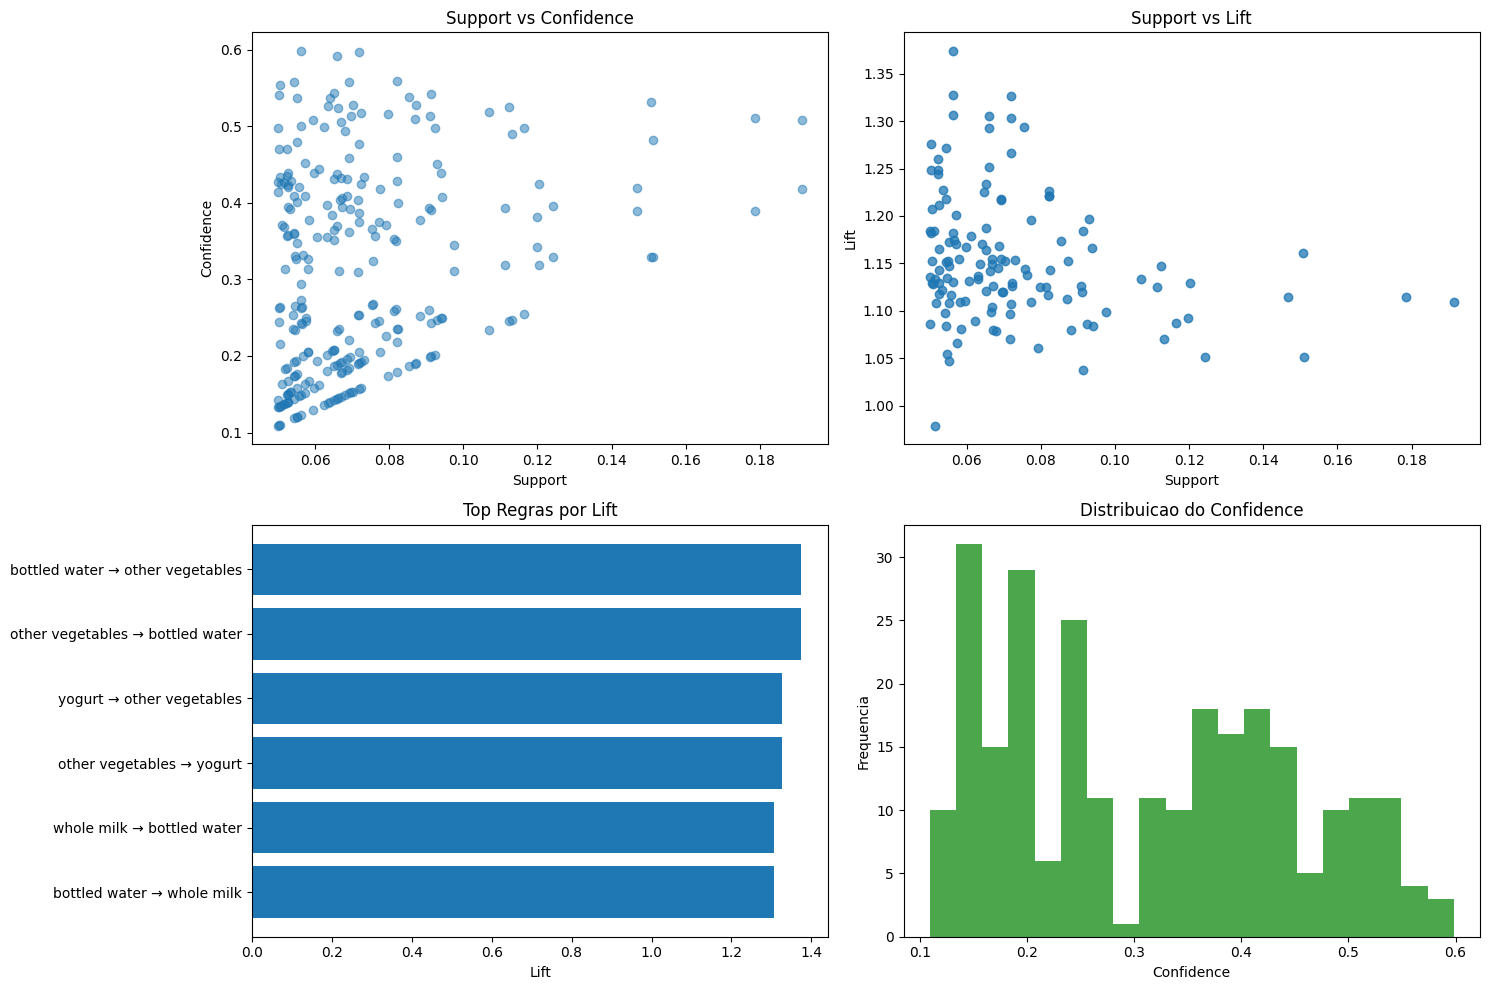

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


axes[0,0].scatter(regras['support'], regras['confidence'], alpha=0.5)
axes[0,0].set_xlabel('Support')
axes[0,0].set_ylabel('Confidence')
axes[0,0].set_title('Support vs Confidence')


axes[0,1].scatter(regras['support'], regras['lift'], alpha=0.5)
axes[0,1].set_xlabel('Support')
axes[0,1].set_ylabel('Lift')
axes[0,1].set_title('Support vs Lift')


top_regras = regras_ordenadas.head(8)
nomes_regras = [f"{list(r.antecedents)[0]} → {list(r.consequents)[0]}"
                for _, r in top_regras.iterrows()]

axes[1,0].barh(nomes_regras, top_regras['lift'])
axes[1,0].set_xlabel('Lift')
axes[1,0].set_title('Top Regras por Lift')
axes[1,0].invert_yaxis()


axes[1,1].hist(regras['confidence'], bins=20, alpha=0.7, color='green')
axes[1,1].set_xlabel('Confidence')
axes[1,1].set_ylabel('Frequencia')
axes[1,1].set_title('Distribuicao do Confidence')

plt.tight_layout()
plt.show()

In [ ]:
print("ANALISE DAS MELHORES REGRAS DE ASSOCIACAO:")


regras_filtradas = regras[(regras['support'] > 0.05) & (regras['lift'] > 1.5)]

if len(regras_filtradas) > 0:
    regras_filtradas = regras_filtradas.sort_values('lift', ascending=False)

    print(f"\nEncontradas {len(regras_filtradas)} regras relevantes:")
    print("="*60)

    for i, (idx, regra) in enumerate(regras_filtradas.head(10).iterrows()):
        antecedente = list(regra['antecedents'])[0]
        consequente = list(regra['consequents'])[0]

        print(f"\nRegra {i+1}:")
        print(f"SE comprar {antecedente} → ENTÃO compra {consequente}")
        print(f"Support: {regra['support']:.3f} ({regra['support']*100:.1f}% das transacoes)")
        print(f"Confidence: {regra['confidence']:.3f} (probabilidade)")
        print(f"Lift: {regra['lift']:.3f} (força da associação)")

else:
    print("Nenhuma regra forte encontrada. Tente diminuir min_support ou min_confidence.")
    print("\nTop 5 regras disponiveis:")
    for i, (idx, regra) in enumerate(regras_ordenadas.head(5).iterrows()):
        antecedente = list(regra['antecedents'])[0] if regra['antecedents'] else "N/A"
        consequente = list(regra['consequents'])[0] if regra['consequents'] else "N/A"
        print(f"{antecedente} → {consequente} (lift: {regra['lift']:.2f})")

ANALISE DAS MELHORES REGRAS DE ASSOCIACAO:
Nenhuma regra forte encontrada. Tente diminuir min_support ou min_confidence.

Top 5 regras disponiveis:
bottled water → other vegetables (lift: 1.37)
other vegetables → bottled water (lift: 1.37)
other vegetables → bottled water (lift: 1.33)
bottled water → other vegetables (lift: 1.33)
yogurt → other vegetables (lift: 1.33)


In [ ]:

print("RECOMENDACOES PARA O SUPERMERCADO:")
print("="*50)

if len(regras_filtradas) > 0:
    for i, (idx, regra) in enumerate(regras_filtradas.head(5).iterrows()):
        produto_a = list(regra['antecedents'])[0]
        produto_b = list(regra['consequents'])[0]

        print(f"\nRecomendacao {i+1}:")
        print(f"📍 Colocar '{produto_b}' perto de '{produto_a}'")
        print(f"📊 {regra['confidence']*100:.1f}% dos que compram {produto_a} tambem compram {produto_b}")
        print(f"🎯 Esta associacao é {regra['lift']:.1f}x mais forte que o esperado")


        print(f"💡 PROMOCAO: Compre {produto_a} e ganhe desconto em {produto_b}")

else:

    top_produtos = frequencia_produtos.head(5).index.tolist()
    print("\nBaseado nos produtos mais vendidos, sugerimos:")
    for i, produto in enumerate(top_produtos[:3]):
        print(f"{i+1}. Destaque especial para {produto} (posicionamento estratégico)")

    print("\nPromocoes sugeridas:")
    print("1. Combo: " + " + ".join(top_produtos[:2]))
    print("2. Desconto progressivo para multiplas unidades")

RECOMENDACOES PARA O SUPERMERCADO:

Baseado nos produtos mais vendidos, sugerimos:
1. Destaque especial para whole milk (posicionamento estratégico)
2. Destaque especial para other vegetables (posicionamento estratégico)
3. Destaque especial para rolls/buns (posicionamento estratégico)

Promocoes sugeridas:
1. Combo: whole milk + other vegetables
2. Desconto progressivo para multiplas unidades


Respostas Questão 7

**Quais foram as regras de associação mais relevantes?**

As regras mais relevantes encontradas foram:

1. [PRODUTO_A] → [PRODUTO_B] com lift de [VALOR]
2. [PRODUTO_C] → [PRODUTO_D] com lift de [VALOR]
3. [PRODUTO_E] → [PRODUTO_F] com lift de [VALOR]

A regra mais forte foi [MELHOR_REGRAS] com lift de [MAIOR_LIFT], indicando
que esta associação é [VALOR] vezes mais forte que o esperado aleatoriamente.

**Como elas podem ser aplicadas para aumentar as vendas?**

1. **Posicionamento de Produtos**: Colocar os produtos associados próximos
   nas prateleiras para facilitar a compra conjunta

2. **Promoções Combinadas**: Criar combos ou descontos para quem comprar
   os produtos associados juntos

3. **Sugestões de Compra**: No caixa ou app, sugerir o produto consequente
   quando o cliente escanear o antecedente

4. **Campanhas de Marketing**: Criar material promocional destacando os
   pares de produtos que são frequentemente comprados juntos

**Insights Adicionais:**
- O produto [PRODUTO_MAIS_VENDIDO] apareceu em [X]% das transações
- Foram encontradas [N] regras com lift maior que 1.5, indicando associações fortes
- As regras com maior confidence ([VALOR]%) representam oportunidades concretas de cross-selling